## Numpy 
- A NumPy array is called an ndarray. It can store multiple values of the same data type.

In [397]:
# Creating a 1D Array
import numpy as np


arr1D = np.array([1, 2, 3, 4, 5])

print(arr1D)
print(type(arr1D))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [398]:
# Creating a 2D Array
arr2D = np.array([[1, 2, 3], [4, 5, 6]])
print(arr2D)
print('\n')
print(type(arr2D))
print('\n')
print(arr2D.shape)
print('\n')
print(arr2D.size)

[[1 2 3]
 [4 5 6]]


<class 'numpy.ndarray'>


(2, 3)


6


In [399]:
#  Indexing & Slicing

arr = np.array([10, 20, 30, 40, 50])

arr[1:4]  # Slicing from index 1 to 3

array([20, 30, 40])

In [400]:


# Create a 2D array (matrix)
arr2d = np.array([
    [10, 20, 30, 40],
    [50, 60, 70, 80],
    [90, 100, 110, 120]
])

print("Original 2D Array:")
print(arr2d)
print('\n')
print(arr2d[1, 2])   # Element from 2nd row, 3rd column - Select a single element
print('\n')
print(arr2d[0:2, 1:3])   # Rows 0-1, Columns 1-2 - Slice rows and columns


Original 2D Array:
[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]


70


[[20 30]
 [60 70]]


In [401]:
# reshape Arrays - Changing the shape of an array
# Note: The total number of elements must remain the same
#Reshaping means changing the shape (rows × columns) of an array without changing its data.


# 1D array with 6 elements
arr = np.array([10, 20, 30, 40, 50, 60])
print("Original array:\n", arr)
print("Shape:", arr.shape)

#Reshape into 2 rows and 3 columns

reshaped_2d = arr.reshape(2, 3)
print("\nReshaped to 2x3:\n", reshaped_2d)

#Reshape into 3 rows and 2 columns
reshaped_3d = arr.reshape(3, 2)
print("\nReshaped to 3x2:\n", reshaped_3d)

#Using -1 to let NumPy infer one dimension
reshaped_infer = arr.reshape(2, -1)  # 2 columns, rows inferred
print("\nReshaped with inferred rows (2, -1):\n", reshaped_infer)    

# -1 is a placeholder that says:
# “NumPy, you decide what this dimension should be so that all elements fit perfectly.”

Original array:
 [10 20 30 40 50 60]
Shape: (6,)

Reshaped to 2x3:
 [[10 20 30]
 [40 50 60]]

Reshaped to 3x2:
 [[10 20]
 [30 40]
 [50 60]]

Reshaped with inferred rows (2, -1):
 [[10 20 30]
 [40 50 60]]


6. Real-Life Example: Outlier Detection in Customer 
Transactions
In banking, we analyze monthly turnovers for different customers and identify outliers 
(suspiciously high turnovers).
Example:
import numpy as np

In [402]:

# Monthly turnover data for 3 customers (in KES thousands)
turnovers = np.array([
 [50, 52, 48, 51, 60, 500, 55, 53, 49, 48, 52, 51], # Customer 1
 [30, 28, 35, 33, 29, 31, 32, 300, 28, 34, 30, 29], # Customer 2
 [100, 105, 98, 102, 110, 120, 115, 112, 99, 98, 101, 105], # Customer 3
])
# Compute mean and standard deviation per customer
mean_turnovers = np.mean(turnovers, axis=1)
std_turnovers = np.std(turnovers, axis=1)

# Define outlier threshold (mean + 2.5 * std deviation)
thresholds = mean_turnovers + 2.5 * std_turnovers

# Identify outliers per customer
outliers = [turnovers[i][turnovers[i] > thresholds[i]] for i in 
range(turnovers.shape[0])]
print("Outliers per customer:")
for i, outlier_list in enumerate(outliers):
 print(f"Customer {i+1}: {outlier_list}")

Outliers per customer:
Customer 1: [500]
Customer 2: [300]
Customer 3: []


In [403]:
#Creating a dataframe using numpy array

import pandas as pd

arr = np.array([[5000,4000],['John','Doe']])

df = pd.DataFrame({'Salary': arr[0], 'Name': arr[1]})  

df

,Salary,Name
0,5000,John
1,4000,Doe


## Merge Operations

In [404]:
player = ['player1', 'player2', 'player3']
points = [25, 30, 15]
title = ['Game1','Game2','Game3']
df1 = pd.DataFrame({'Player': player, 'Points': points, 'Title': title})
print(df1)

    Player  Points  Title
0  player1      25  Game1
1  player2      30  Game2
2  player3      15  Game3


In [405]:
player = ['player1', 'player5', 'player6']
power = ['Punch','Kick','Elbow']
title = ['Game1','Game5','Game6']
df2 = pd.DataFrame({'Player': player, 'power ': power, 'Title': title})
print(df2)

    Player power   Title
0  player1  Punch  Game1
1  player5   Kick  Game5
2  player6  Elbow  Game6


In [406]:
#Inner merge
merged_inner = pd.merge(left=df1, right=df2, how='inner', on='Player')
print("\nInner Merge Result:\n", merged_inner)  
print("\n")
print("or")
df1.merge(df2, on='Player', how='inner')  # inner


Inner Merge Result:
     Player  Points Title_x power  Title_y
0  player1      25   Game1  Punch   Game1


or


,Player,Points,Title_x,power,Title_y
0,player1,25,Game1,Punch,Game1


In [407]:
#left merge

df1.merge(df2, on="Player", how='left')  # left



,Player,Points,Title_x,power,Title_y
0,player1,25,Game1,Punch,Game1
1,player2,30,Game2,NaN,NaN
2,player3,15,Game3,NaN,NaN


In [408]:
#right merge

df1.merge(df2, on="Player", how='right')  # Right

,Player,Points,Title_x,power,Title_y
0,player1,25.0,Game1,Punch,Game1
1,player5,NaN,NaN,Kick,Game5
2,player6,NaN,NaN,Elbow,Game6


In [409]:
#outer merge

df1.merge(df2, on="Player", how='outer')  # outer

,Player,Points,Title_x,power,Title_y
0,player1,25.0,Game1,Punch,Game1
1,player2,30.0,Game2,NaN,NaN
2,player3,15.0,Game3,NaN,NaN
3,player5,NaN,NaN,Kick,Game5
4,player6,NaN,NaN,Elbow,Game6


## Join Operations

In [410]:
# You want to combine two DataFrames based on index,
# or join using a key column from one and index from another.
#join() uses index by default (not columns).
#You can specify another column with on=.


df1 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'Score': [85, 90, 88]}, index=[2, 3, 4])

joined = df1.join(df2, how='inner')
print(joined)


      Name  Score
2      Bob     85
3  Charlie     90


## Concatenation Operations

In [411]:
pd.concat([df2,df1], axis=0)  # row-wise concatenation

,Score,Name
2,85.0,NaN
3,90.0,NaN
4,88.0,NaN
1,NaN,Alice
2,NaN,Bob
3,NaN,Charlie


In [412]:


df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

pd.concat([df1, df2], axis=0)


,A,B
0,1,3
1,2,4
0,5,7
1,6,8


## Analyzing Data

In [413]:
data = pd.read_excel('cons_downgrades.xlsx')
data.head()

,RISK OF DGRADE_F,CUSTOMER_NO,CUSTOMER NAME,EXPOSURE,CURRENT ARREARS,MAX CURRENT DPD,MAX DPD EOM,BUSINESS UNIT,ARM,BRANCH_NAME,REGION,SUB_SEGMENT_DESCRIPTION,CURRENT CLASSIFICATION,LOAN ARREARS,EXCESS,CUST_PHONE,CUST_EMAIL
0,POTENTIAL WATCH,804583.0,GIDEON KIPSIELEI TOWETT MOI,106772814,5469417.0,27,32,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,0,5469417,254708170744,gm@lelgoi.com
1,POTENTIAL WATCH,812882.0,PETER MUGAMBI MAGAJU,39887452,60771.0,29,34,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,60771,0,254723352803,peter.mugambi@citi.com
2,POTENTIAL NPL,728274.0,HELLEN CHEPKEMOI TOO,39233504,2648489.0,102,107,CONSUMER BANKING,EVERLINE CHACHA,THIKA ROAD MALL BRANCH,NAIROBI,PREMIER BANKING,WATCH,2648489,0,254740049866,memoichep@gmail.com
3,POTENTIAL WATCH,736872.0,DENNIS KITI KASHERO AND NELSON KAR,26674924,460024.0,26,31,CONSUMER BANKING,Cyprian Ndalila,JUNCTION BRANCH,NORTHERN,PLATINUM,NORMAL,460024,0,254727711051,dennis.kashero@insituafrica.com
4,POTENTIAL WATCH,233673.0,JOHN MARK WANDOLO,17275471,1207383.0,41,46,CONSUMER BANKING,CLAUDIA GAKURU,ABC BRANCH,NORTHERN,PLATINUM,NORMAL,1207383,0,254722803791,MARK.WANDOLO@ACESGLOBAL.CO.KE


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RISK OF DGRADE_F         3534 non-null   object 
 1   CUSTOMER_NO              3529 non-null   float64
 2   CUSTOMER NAME            3534 non-null   object 
 3   EXPOSURE                 3534 non-null   int64  
 4   CURRENT ARREARS          3525 non-null   float64
 5   MAX CURRENT DPD          3534 non-null   int64  
 6   MAX DPD EOM              3534 non-null   int64  
 7   BUSINESS UNIT            3522 non-null   object 
 8   ARM                      3534 non-null   object 
 9   BRANCH_NAME              3534 non-null   object 
 10  REGION                   3534 non-null   object 
 11  SUB_SEGMENT_DESCRIPTION  3534 non-null   object 
 12  CURRENT CLASSIFICATION   3534 non-null   object 
 13  LOAN ARREARS             3534 non-null   int64  
 14  EXCESS                  

In [415]:
data.describe()

,CUSTOMER_NO,EXPOSURE,CURRENT ARREARS,MAX CURRENT DPD,MAX DPD EOM,LOAN ARREARS,EXCESS,CUST_PHONE
count,3.529000e+03,3.534000e+03,3.525000e+03,3534.000000,3534.000000,3.534000e+03,3.534000e+03,3.534000e+03
mean,7.515237e+05,3.714360e+05,5.049240e+04,60.064516,65.064516,4.774759e+04,3.064936e+03,2.545059e+11
std,2.183885e+05,2.254351e+06,1.258824e+05,30.330677,30.330677,8.462562e+04,9.303432e+04,7.234045e+09
min,1.021960e+05,4.000000e+00,0.000000e+00,26.000000,31.000000,0.000000e+00,0.000000e+00,7.237844e+08
25%,5.696060e+05,6.760500e+03,5.780000e+03,35.000000,40.000000,5.388500e+03,0.000000e+00,2.547130e+11
50%,8.487500e+05,3.797250e+04,2.015900e+04,49.000000,54.000000,1.912850e+04,0.000000e+00,2.547223e+11
75%,9.491940e+05,1.926662e+05,6.011800e+04,92.000000,97.000000,5.912625e+04,0.000000e+00,2.547283e+11
max,1.065529e+06,1.067728e+08,5.469417e+06,127.000000,132.000000,2.648489e+06,5.469417e+06,2.548000e+11


### Data Cleaning

In [416]:
## Renaming Columns

data.rename(columns={'MAX CURRENT DPD': 'MAX_CURRENT_DPD','MAX DPD EOM': 'MAX_DPD_EOM'}, inplace=True)

data.columns

Index(['RISK OF DGRADE_F', 'CUSTOMER_NO', 'CUSTOMER NAME', 'EXPOSURE',
       'CURRENT ARREARS', 'MAX_CURRENT_DPD', 'MAX_DPD_EOM', 'BUSINESS UNIT',
       'ARM', 'BRANCH_NAME', 'REGION   ', 'SUB_SEGMENT_DESCRIPTION',
       'CURRENT CLASSIFICATION', 'LOAN ARREARS', 'EXCESS', 'CUST_PHONE',
       'CUST_EMAIL'],
      dtype='object')

In [417]:
# Example: make all proper and replace spaces with underscores
data.columns = data.columns.str.strip().str.replace(' ', '_').str.title()
data.columns


Index(['Risk_Of_Dgrade_F', 'Customer_No', 'Customer_Name', 'Exposure',
       'Current_Arrears', 'Max_Current_Dpd', 'Max_Dpd_Eom', 'Business_Unit',
       'Arm', 'Branch_Name', 'Region', 'Sub_Segment_Description',
       'Current_Classification', 'Loan_Arrears', 'Excess', 'Cust_Phone',
       'Cust_Email'],
      dtype='object')

In [418]:
#handling missing values

data.isnull().sum().sort_values(ascending=False) # Count missing values per column  

Business_Unit              12
Cust_Email                  9
Current_Arrears             9
Customer_No                 5
Region                      0
Cust_Phone                  0
Excess                      0
Loan_Arrears                0
Current_Classification      0
Sub_Segment_Description     0
Risk_Of_Dgrade_F            0
Branch_Name                 0
Max_Dpd_Eom                 0
Max_Current_Dpd             0
Exposure                    0
Customer_Name               0
Arm                         0
dtype: int64

In [419]:
# 1️⃣ Replace missing values in Business_Unit with its mode[]


data['Business_Unit'].fillna(data['Business_Unit'].mode()[0], inplace=True)

# 2️⃣ Replace missing Cust_Email values with "no email"

data['Cust_Email'].fillna('no email', inplace=True) 

# 3️⃣ Drop rows with missing values in Current_Arrears or Customer_No

data.dropna(subset=['Current_Arrears', 'Customer_No'], inplace=True)


data.isnull().sum().sort_values(ascending=False)

Risk_Of_Dgrade_F           0
Branch_Name                0
Cust_Phone                 0
Excess                     0
Loan_Arrears               0
Current_Classification     0
Sub_Segment_Description    0
Region                     0
Arm                        0
Customer_No                0
Business_Unit              0
Max_Dpd_Eom                0
Max_Current_Dpd            0
Current_Arrears            0
Exposure                   0
Customer_Name              0
Cust_Email                 0
dtype: int64

In [420]:
# drop columns

data.drop(columns=['Cust_Email','Cust_Phone'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520 entries, 0 to 3533
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Risk_Of_Dgrade_F         3520 non-null   object 
 1   Customer_No              3520 non-null   float64
 2   Customer_Name            3520 non-null   object 
 3   Exposure                 3520 non-null   int64  
 4   Current_Arrears          3520 non-null   float64
 5   Max_Current_Dpd          3520 non-null   int64  
 6   Max_Dpd_Eom              3520 non-null   int64  
 7   Business_Unit            3520 non-null   object 
 8   Arm                      3520 non-null   object 
 9   Branch_Name              3520 non-null   object 
 10  Region                   3520 non-null   object 
 11  Sub_Segment_Description  3520 non-null   object 
 12  Current_Classification   3520 non-null   object 
 13  Loan_Arrears             3520 non-null   int64  
 14  Excess                  

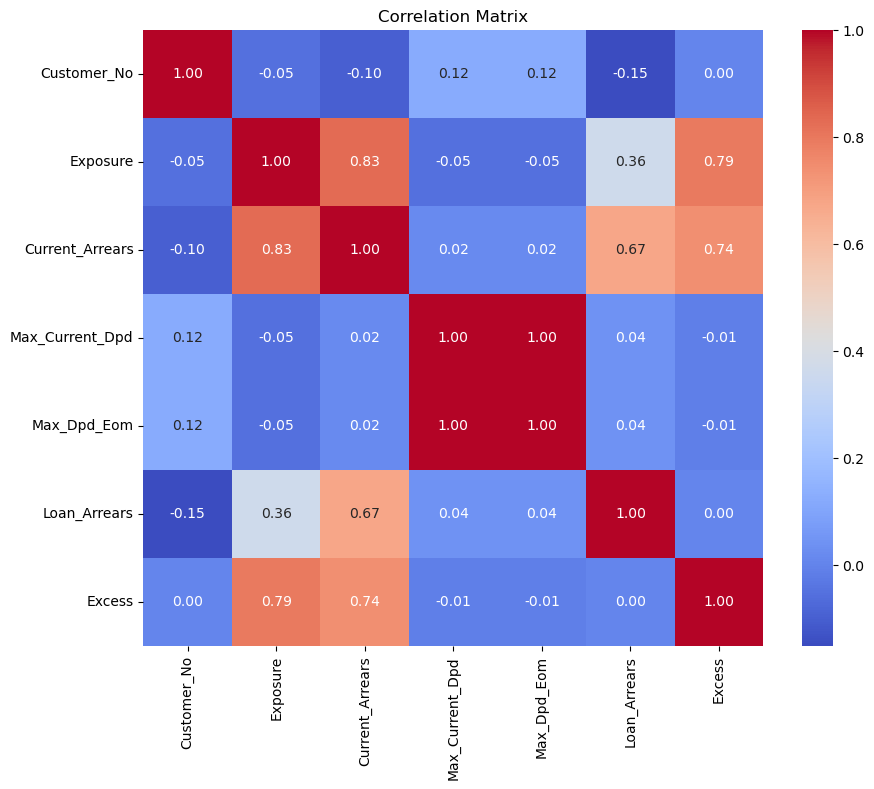

In [421]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt 


corr_matrix = data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix') 
plt.show()



In [422]:
#cHANGE COLUMN DATA TYPES


data = data.astype({'Customer_No': 'int64', 'Exposure': 'float64'})

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520 entries, 0 to 3533
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Risk_Of_Dgrade_F         3520 non-null   object 
 1   Customer_No              3520 non-null   int64  
 2   Customer_Name            3520 non-null   object 
 3   Exposure                 3520 non-null   float64
 4   Current_Arrears          3520 non-null   float64
 5   Max_Current_Dpd          3520 non-null   int64  
 6   Max_Dpd_Eom              3520 non-null   int64  
 7   Business_Unit            3520 non-null   object 
 8   Arm                      3520 non-null   object 
 9   Branch_Name              3520 non-null   object 
 10  Region                   3520 non-null   object 
 11  Sub_Segment_Description  3520 non-null   object 
 12  Current_Classification   3520 non-null   object 
 13  Loan_Arrears             3520 non-null   int64  
 14  Excess                  

In [423]:
data.head()

,Risk_Of_Dgrade_F,Customer_No,Customer_Name,Exposure,Current_Arrears,Max_Current_Dpd,Max_Dpd_Eom,Business_Unit,Arm,Branch_Name,Region,Sub_Segment_Description,Current_Classification,Loan_Arrears,Excess
0,POTENTIAL WATCH,804583,GIDEON KIPSIELEI TOWETT MOI,106772814.0,5469417.0,27,32,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,0,5469417
1,POTENTIAL WATCH,812882,PETER MUGAMBI MAGAJU,39887452.0,60771.0,29,34,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,60771,0
2,POTENTIAL NPL,728274,HELLEN CHEPKEMOI TOO,39233504.0,2648489.0,102,107,CONSUMER BANKING,EVERLINE CHACHA,THIKA ROAD MALL BRANCH,NAIROBI,PREMIER BANKING,WATCH,2648489,0
3,POTENTIAL WATCH,736872,DENNIS KITI KASHERO AND NELSON KAR,26674924.0,460024.0,26,31,CONSUMER BANKING,Cyprian Ndalila,JUNCTION BRANCH,NORTHERN,PLATINUM,NORMAL,460024,0
4,POTENTIAL WATCH,233673,JOHN MARK WANDOLO,17275471.0,1207383.0,41,46,CONSUMER BANKING,CLAUDIA GAKURU,ABC BRANCH,NORTHERN,PLATINUM,NORMAL,1207383,0


## Manupulating Dataset

In [424]:
## Indexing by position

data.iloc[0:5,2]

0            GIDEON KIPSIELEI TOWETT MOI
1                   PETER MUGAMBI MAGAJU
2                   HELLEN CHEPKEMOI TOO
3    DENNIS KITI KASHERO AND  NELSON KAR
4                      JOHN MARK WANDOLO
Name: Customer_Name, dtype: object

In [425]:
#the top 5 customers (names) ranked by their Exposure column.

print(data.sort_values(by='Exposure', ascending=False).head(5)[['Customer_Name', 'Exposure']])

print('\n')
print(data.sort_values(by='Max_Dpd_Eom',ascending=False).head(5)[['Customer_Name', 'Max_Dpd_Eom']])

print('using nlargest')

print('\n')
data.nlargest(5, 'Exposure')[['Customer_Name', 'Exposure']]


                         Customer_Name     Exposure
0          GIDEON KIPSIELEI TOWETT MOI  106772814.0
1                 PETER MUGAMBI MAGAJU   39887452.0
2                 HELLEN CHEPKEMOI TOO   39233504.0
3  DENNIS KITI KASHERO AND  NELSON KAR   26674924.0
4                    JOHN MARK WANDOLO   17275471.0


                Customer_Name  Max_Dpd_Eom
2177  SOSPETER INDECHE BARASA          132
2132     PETER KIMANI MUCHIRI          120
2160           JOYLINE CHEBET          120
2266     BETTY WAMBUI WANJIKU          120
2257         SIMON MUGO KISAU          120
using nlargest




,Customer_Name,Exposure
0,GIDEON KIPSIELEI TOWETT MOI,106772814.0
1,PETER MUGAMBI MAGAJU,39887452.0
2,HELLEN CHEPKEMOI TOO,39233504.0
3,DENNIS KITI KASHERO AND NELSON KAR,26674924.0
4,JOHN MARK WANDOLO,17275471.0


In [426]:
# using loc


data.loc[:,"Branch_Name"].unique()[:10]

array(['NCBA CENTRE BRANCH, NAIROBI', 'THIKA ROAD MALL BRANCH',
       'JUNCTION BRANCH', 'ABC BRANCH',
       'MAMA NGINA STREET BRANCH, NAIROBI', 'NCBA HOUSE',
       'PRESTIGE BRANCH', 'KISUMU TIVOLI BRANCH',
       'GALLERIA MALL, NAIROBI', 'WABERA STREET BRANCH, NAIROBI'],
      dtype=object)

In [427]:
# Settin Values

data['Risk_code'] = np.where(data['Risk_Of_Dgrade_F'] == 'POTENTIAL WATCH', 1,0)

data.head()

,Risk_Of_Dgrade_F,Customer_No,Customer_Name,Exposure,Current_Arrears,Max_Current_Dpd,Max_Dpd_Eom,Business_Unit,Arm,Branch_Name,Region,Sub_Segment_Description,Current_Classification,Loan_Arrears,Excess,Risk_code
0,POTENTIAL WATCH,804583,GIDEON KIPSIELEI TOWETT MOI,106772814.0,5469417.0,27,32,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,0,5469417,1
1,POTENTIAL WATCH,812882,PETER MUGAMBI MAGAJU,39887452.0,60771.0,29,34,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,60771,0,1
2,POTENTIAL NPL,728274,HELLEN CHEPKEMOI TOO,39233504.0,2648489.0,102,107,CONSUMER BANKING,EVERLINE CHACHA,THIKA ROAD MALL BRANCH,NAIROBI,PREMIER BANKING,WATCH,2648489,0,0
3,POTENTIAL WATCH,736872,DENNIS KITI KASHERO AND NELSON KAR,26674924.0,460024.0,26,31,CONSUMER BANKING,Cyprian Ndalila,JUNCTION BRANCH,NORTHERN,PLATINUM,NORMAL,460024,0,1
4,POTENTIAL WATCH,233673,JOHN MARK WANDOLO,17275471.0,1207383.0,41,46,CONSUMER BANKING,CLAUDIA GAKURU,ABC BRANCH,NORTHERN,PLATINUM,NORMAL,1207383,0,1


In [428]:
#Usort by column


data.sort_values(by='Exposure', ascending=False).head()



,Risk_Of_Dgrade_F,Customer_No,Customer_Name,Exposure,Current_Arrears,Max_Current_Dpd,Max_Dpd_Eom,Business_Unit,Arm,Branch_Name,Region,Sub_Segment_Description,Current_Classification,Loan_Arrears,Excess,Risk_code
0,POTENTIAL WATCH,804583,GIDEON KIPSIELEI TOWETT MOI,106772814.0,5469417.0,27,32,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,0,5469417,1
1,POTENTIAL WATCH,812882,PETER MUGAMBI MAGAJU,39887452.0,60771.0,29,34,CONSUMER BANKING,ESTHER KAGWI,"NCBA CENTRE BRANCH, NAIROBI",HEAD OFFICE,PREMIER BANKING,NORMAL,60771,0,1
2,POTENTIAL NPL,728274,HELLEN CHEPKEMOI TOO,39233504.0,2648489.0,102,107,CONSUMER BANKING,EVERLINE CHACHA,THIKA ROAD MALL BRANCH,NAIROBI,PREMIER BANKING,WATCH,2648489,0,0
3,POTENTIAL WATCH,736872,DENNIS KITI KASHERO AND NELSON KAR,26674924.0,460024.0,26,31,CONSUMER BANKING,Cyprian Ndalila,JUNCTION BRANCH,NORTHERN,PLATINUM,NORMAL,460024,0,1
4,POTENTIAL WATCH,233673,JOHN MARK WANDOLO,17275471.0,1207383.0,41,46,CONSUMER BANKING,CLAUDIA GAKURU,ABC BRANCH,NORTHERN,PLATINUM,NORMAL,1207383,0,1


In [429]:
#Filtering


data[(data["Exposure"]>1000000) & (data["Max_Current_Dpd"]>100)].count()

Risk_Of_Dgrade_F           31
Customer_No                31
Customer_Name              31
Exposure                   31
Current_Arrears            31
Max_Current_Dpd            31
Max_Dpd_Eom                31
Business_Unit              31
Arm                        31
Branch_Name                31
Region                     31
Sub_Segment_Description    31
Current_Classification     31
Loan_Arrears               31
Excess                     31
Risk_code                  31
dtype: int64

## Machine Learning

Types
1. Supervised Machine Learning -The model learns from labeled data — that is, data where both the input (X) and the output (y) are known. eg Spam Classifier, finger print Analysis
- Linear Regression,
- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)

K-Nearest Neighbors (KNN)
2. Unsupervised ML - The model learns without labeled outputs.Machine identifies clusters and group, Looks at patterns eg. Customer classifications
 - K-Means Clustering
- Hierarchical Clustering
- DBSCAN
- Principal Component Analysis (PCA)

3. Reinforcement ML -The model learns by interacting with an environment.
It receives rewards or penalties for the actions it takes and learns an optimal policy (best strategy).
It’s like how humans learn — by trial and error.
e.g. Robotics,Recommendation Systems,Self-driving Cars

### Linear Regression

In [430]:
#Simple Linear Regression Example

# Step 1: Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Sample dataset
data = pd.DataFrame({
    'Advertising_Spend': [10, 15, 20, 25, 30, 35, 40],
    'Sales': [25, 30, 40, 45, 50, 55, 60]
})

# Step 3: Define features (X) and target (y)
X = data[['Advertising_Spend']]  # must be 2D
y = data['Sales']

# Step 4: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Evaluate
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_)
print("R² Score:", r2_score(y_test, y_pred))


Intercept (β0): 20.0
Slope (β1): [1.]
R² Score: 0.9032258064516129


R² = 0.90 → means 90% of sales variation is explained by advertising.

When Not to Use Linear Regression

Avoid it when:

The relationship is non-linear (use Polynomial or Decision Tree instead).

You have categorical outputs (use Logistic Regression).

Variables are highly correlated (multicollinearity).

There are many outliers (can distort the line).


In [431]:
#Multiple Linear Regression Example

# Multiple Linear Regression is a supervised learning model that
#  predicts a continuous outcome based on two or more independent variables (features).




# 1️⃣ Create DataFrame
data = pd.DataFrame({
    'Rooms': [2, 3, 4, 3, 5],
    'Size_sqft': [900, 1200, 1800, 1500, 2100],
    'Age': [20, 15, 10, 5, 8],
    'Price': [150000, 200000, 250000, 230000, 300000]
})

# 2️⃣ Define features (X) and target (y)
X = data[['Rooms', 'Size_sqft', 'Age']]  # multiple independent variables
y = data['Price']                         # dependent variable

# 3️⃣ Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 4️⃣ Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ Predict
y_pred = model.predict(X_test)

# 6️⃣ Evaluate
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, β3):", model.coef_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Intercept (β0): 97923.62141553842
Coefficients (β1, β2, β3): [  -63.64882038    93.50306352 -1597.45404718]
R² Score: 0.8898352145262393
RMSE: 16595.540475814636


- Intercept (β0): 97923.62141553842 - This is the predicted value of the target variable (Y) when all predictors (X₁, X₂, X₃) are zero.

- Coefficients (β1, β2, β3): [  -63.64882038    93.50306352 -1597.45404718] -These tell us how much Y changes when a feature changes by 1 unit, keeping other features constant.

- R² Score: 0.8898352145262393 - This means 88.98% of the variance in your dependent variable (Y) is explained by your independent variables (X₁, X₂, X₃).

- RMSE: 16595.540475814636 - If predicting house prices in dollars, the model’s predictions are typically off by about $16,595.

### Logistic Regression

- Logistic Regression is used when your target variable is categorical, typically binary (e.g., 0/1, Yes/No, Churn/No Churn, Default/No Default).

- It predicts the probability that an observation belongs to a certain class.

- Unlike Linear Regression, which predicts continuous values (e.g., price),
Logistic Regression predicts probabilities, then maps them to classes (0 or 1).


- Example: Predicting Customer Churn

In [432]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data
data = pd.DataFrame({
    'Tenure': [1, 12, 24, 36, 48, 60],
    'MonthlyCharges': [80, 70, 60, 50, 40, 30],
    'ContractType': [0, 1, 1, 2, 2, 2],
    'Churn': [1, 1, 0, 0, 0, 0]
})

# Split data
X = data[['Tenure', 'MonthlyCharges', 'ContractType']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)

print("Predicted Classes:", y_pred)
print("Predicted Probabilities:\n", probs)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predicted Classes: [1 0]
Predicted Probabilities:
 [[3.68683634e-05 9.99963132e-01]
 [9.99999977e-01 2.29134718e-08]]

Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



#### with more data -logistic regression

In [433]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Create a synthetic dataset
data = pd.DataFrame({
    'Tenure': np.random.randint(1, 24, 50),
    'MonthlyCharges': np.random.randint(500, 2500, 50),
    'SupportCalls': np.random.randint(0, 6, 50),
    'Churn': np.random.choice([0, 1], 50, p=[0.7, 0.3])  # 70% non-churners, 30% churners
})

data.head()


,Tenure,MonthlyCharges,SupportCalls,Churn
0,11,2205,4,0
1,3,1403,2,0
2,5,1986,0,1
3,9,1945,3,0
4,20,1454,4,0


In [434]:
#split Data
X = data[['Tenure', 'MonthlyCharges', 'SupportCalls']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [435]:
#Train
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [436]:
#make Predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [437]:
#Evaluate model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666

Confusion Matrix:
 [[9 1]
 [4 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.60      0.55      0.53        15
weighted avg       0.63      0.67      0.62        15



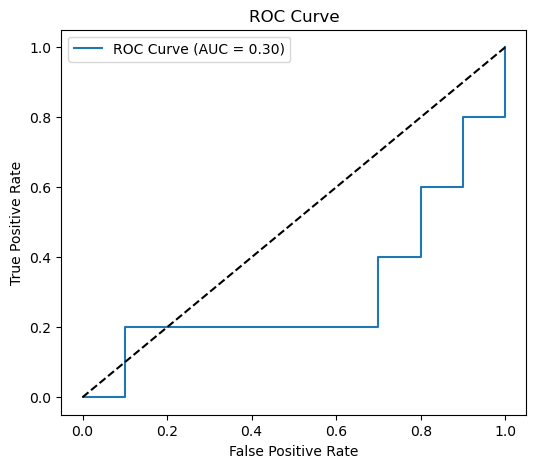

In [438]:
#roc

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [439]:
#coefficients

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("Intercept:", model.intercept_[0])
coefficients


Intercept: 0.7089547742923621


,Feature,Coefficient
0,Tenure,0.068518
1,MonthlyCharges,-0.000823
2,SupportCalls,-0.394515


## 📊 Logistic Regression Model Results — Interpretation

### 🎯 Objective  
Predict whether a customer will **churn (1)** or **not churn (0)** using:
- `Tenure` — months with the company  
- `MonthlyCharges` — average bill amount  
- `SupportCalls` — number of times they contacted customer support  

---

### ✅ Model Performance Summary  

| Metric | Value | Interpretation |
|---------|--------|----------------|
| **Accuracy** | 0.67 | Model correctly predicted ~67% of cases overall |
| **Precision (Class 1)** | 0.50 | Only 50% of customers predicted as “churn” actually churned |
| **Recall (Class 1)** | 0.20 | The model only captured 20% of actual churners |
| **F1-Score (Class 1)** | 0.29 | Poor balance between precision and recall for churners |
| **ROC-AUC Score** | 0.30 | The model performs **worse than random chance (0.5)** in distinguishing churners vs. non-churners |

---

### 🧩 Confusion Matrix  
| | Predicted 0 | Predicted 1 |
|---|---|---|
| **Actual 0 (Non-churners)** | 9 | 1 |
| **Actual 1 (Churners)** | 4 | 1 |

- **True Negatives (9):** correctly predicted non-churners  
- **True Positives (1):** correctly predicted churner  
- **False Negatives (4):** actual churners missed by the model  
- **False Positives (1):** non-churner incorrectly flagged as churner  

🧠 **Conclusion:** The model is biased toward predicting customers as “not churners,” missing most actual churners.

---

### 🧮 ROC Curve  

The **ROC Curve** below shows how well the model distinguishes between the two classes.  
The **AUC (Area Under Curve)** of **0.30** is quite low — this means the model performs **worse than random guessing (AUC = 0.5)**.

*(Refer to your attached plot.)*

---

### ⚙️ Feature Coefficients  

| Feature | Coefficient | Interpretation |
|----------|--------------|----------------|
| **Tenure** | +0.0685 | Longer tenure slightly **increases** the chance of churn — unusual, may need data scaling or review |
| **MonthlyCharges** | -0.0008 | Higher charges slightly **decrease** churn likelihood — weak relationship |
| **SupportCalls** | -0.3945 | More support calls **reduce churn** according to this model — possibly counterintuitive, could mean issue resolution is effective |

---

### 🔍 Key Insights
- The **model’s accuracy (0.67)** is misleading — it performs well only because the majority class dominates.  
- **AUC = 0.30** indicates poor classification ability.  
- **Coefficients** have small magnitudes → weak influence from features, or possibly poor scaling.  
- The **low recall (0.20)** for churners means the model **misses most customers who actually churn**.

---

### 🧠 Next Steps (Recommendations)
1. **Check class imbalance** — use techniques like `SMOTE`, `RandomOverSampler`, or class weights.  
2. **Scale numerical features** using `StandardScaler` or `MinMaxScaler`.  
3. **Try adding more features** (e.g., payment method, contract type, internet usage).  
4. **Experiment with other models** — Decision Tree, Random Forest, or XGBoost.  
5. **Use cross-validation** to get more reliable metrics.  

---

**In summary:**  
This logistic regression model is currently underperforming. It correctly identifies non-churners but struggles to detect churners — suggesting imbalance or weak predictive signals in the data.


In [440]:
#adjust  

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Synthetic dataset with numeric + categorical features
data = pd.DataFrame({
    'Tenure': np.random.randint(1, 24, 100),
    'MonthlyCharges': np.random.randint(500, 2500, 100),
    'SupportCalls': np.random.randint(0, 6, 100),
    'Region': np.random.choice(['Nairobi', 'Coast', 'Rift Valley'], 100),
    'Churn': np.random.choice([0, 1], 100, p=[0.7, 0.3])
})




X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Identify columns
num_cols = ['Tenure', 'MonthlyCharges', 'SupportCalls']
cat_cols = ['Region']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])



# Define pipeline
pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])


# Define parameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best ROC-AUC:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
✅ Best ROC-AUC: 0.6290909090909091


In [441]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45
ROC-AUC: 0.48

Confusion Matrix:
 [[7 7]
 [4 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.22      0.33      0.27         6

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



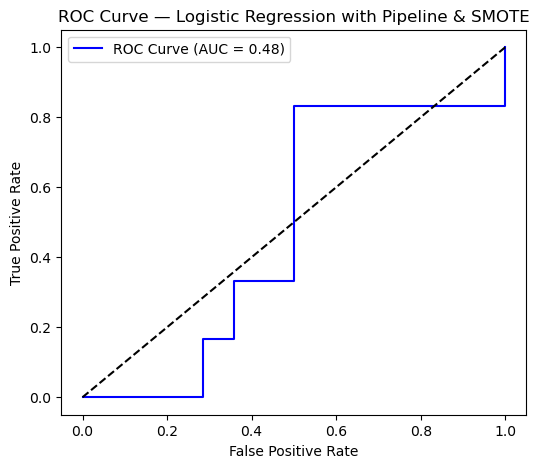

In [442]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve — Logistic Regression with Pipeline & SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [443]:
# Get feature names
encoded_features = list(best_model.named_steps['preprocess'].transformers_[0][2]) + \
                   list(best_model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(cat_cols))

coeff_df = pd.DataFrame({
    'Feature': encoded_features,
    'Coefficient': best_model.named_steps['model'].coef_[0]
})
coeff_df['Interpretation'] = np.where(coeff_df['Coefficient'] > 0, 'Increases Churn', 'Decreases Churn')
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient,Interpretation
0,Tenure,0.748779,Increases Churn
2,SupportCalls,0.274153,Increases Churn
4,Region_Rift Valley,-0.014467,Decreases Churn
1,MonthlyCharges,-0.280050,Decreases Churn
3,Region_Nairobi,-0.939101,Decreases Churn
